# Toyexample

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(7531)

# bin mir nicht mehr ganz sicher ob man "pgf.texsystem" braucht oder nicht - würde es erst ohne probieren
plt.rcParams.update({
    "text.usetex": True,
    "font.size" : 12,
    #"pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": True,
    "lines.antialiased": True,
    "patch.antialiased": True,
    'axes.linewidth': 0.1
})


def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)
    
    
# CHECK AGAIN IF THIS IS ALWAYS TRUE OR FORMAT DEPENDENT
LATEX_WIDTH = 455.24411 
    
# default size
plt.rcParams['figure.figsize'] = set_size(LATEX_WIDTH, fraction=1.)

# Für subplots z.B. (mit der fraction muss man ein bisschen spielen):
#plt.figure(figsize=set_size(LATEX_WIDTH, fraction=1.6, subplots=(1,2)))

# Speichern
#plt.savefig('path/to/plot/fig_name.pgf', bbox_inches='tight',pad_inches=0.1, dpi=1000)  


<span style="color:#337AA1; font-weight: bold;">blue</span>  = "#337AA1"  
<span style="color:#0CB5ED; font-weight: bold;">blue2</span>  = "#0CB5ED"  
<span style="color:#1B2F57; font-weight: bold;">blue3</span>  = "#1B2F57"  
<span style="color:#5A7585; font-weight: bold;">bluegrey</span>  = "#5A7585"  
<span style="color:#24D6B1; font-weight: bold;">turq</span>  = "#24D6B1"  
<span style="color:#A12D03; font-weight: bold;">red</span>  = "#A12D03"  
<span style="color:#945A54; font-weight: bold;">red2</span>  = "#945A54"  
<span style="color:#E65849; font-weight: bold;">red3</span> = "#E65849"  
<span style="color:#5C0000; font-weight: bold;">red4</span> = "#5C0000"  
<span style="color:#A03D4D; font-weight: bold;">red5</span> = "#A03D4D"   
<span style="color:#E0B25E; font-weight: bold;">och</span>  = "#E0B25E"  
<span style="color:#AAE070; font-weight: bold;">lime</span>  = "#AAE070"  
<span style="color:#005C17; font-weight: bold;">green</span>  = "#005C17"   
<span style="color:#109958; font-weight: bold;">green2</span>  = "#109958"    
<span style="color:#91D68D; font-weight: bold;">green3</span>  = "#91D68D"  
<span style="color:#DB8436; font-weight: bold;">orange</span>  = "#DB8436"  
<span style="color:#613D0C; font-weight: bold;">brown</span>  = "#613D0C"  
<span style="color:#532A80; font-weight: bold;">lila</span>  = "#532A80"  
<span style="color:#525252; font-weight: bold;">grey</span>  = "#525252"   

In [2]:
red5 = "#C96A57"
blue4 = "#8CC6FF"
green3 = "#9CFFA5"

In [3]:
blue = "#337AA1"  
blue2 = "#0CB5ED"
blue3 = "#1B2F57"
bluegrey = "#5A7585"
turq = "#24D6B1"  
turq2 = "#09736A"
red = "#A12D03"  
red2  = "#945A54"
red3 = "#E65849"
red4 = "#5C0000"
red5 = "#A03D4D" #A03D4D A1154D B84659
och = "#E0B25E"  
lime = "#AAE070"  
green = "#005C17"  
green2 = "#109958"
green3 = "#91D68D" #0AA16C 8ED18A 91D68D
orange = "#DB8436"  
brown  = "#613D0C"  
lila  = "#532A80"  
grey = "#525252"   

True Parameters

In [4]:
import os
os.getcwd()

'/home/nils/projects/randomforest_weighting/Theoretical Example'

In [5]:
n = 20
k = 5
I = np.arange(k)
I_not = np.arange(I[-1]+1, n)
theta_s = .8
w_true = np.array([theta_s/k if i in I else (1-theta_s)/(n-k) for i in range(n)])

Estimated Parameters

Text(0.5, 0, '$i$')

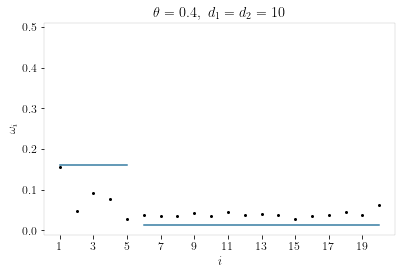

In [6]:
d1 = 10
d2 = d1
theta = .4
Z1 = np.random.dirichlet(np.repeat(d1, k))
Z2 = np.random.dirichlet(np.repeat(d2, n-k))

mask = np.ones(n, dtype=bool)
mask[I] = False

w_hat = np.zeros(n)
w_hat[I] = theta * Z1
w_hat[I_not] = (1-theta) * Z2

plt.figure(figsize=set_size(LATEX_WIDTH, fraction=1., subplots=(1,1)))
plt.plot(I, w_true[I], color=blue)
plt.plot(I_not, w_true[mask], color=blue)
plt.plot(w_hat, ls='', marker='o', color='black', markersize=2)
plt.title(f'$\\theta={theta},~d_1=d_2={d1}$')
#plt.plot(I, np.repeat(w_hat[I].mean(), len(I)), color=grey, ls='--')
#plt.plot(I_not, np.repeat(w_hat[I_not].mean(), len(I_not)), color=grey, ls='--')
plt.ylim(-0.01,0.51)
plt.ylabel("$\\omega_i$")
_ = plt.xticks(np.arange(0,20,2), np.arange(0,20,2)+1)
plt.xlabel("$i$")

#plt.savefig(f'./plots/weight_example_theta_star={theta_s}_theta={theta}_d1={d1}_d2={d2}_n={n}_k={k}.pdf', bbox_inches='tight',pad_inches=0.1, dpi=1000)  

Text(0.5, 0, '$i$')

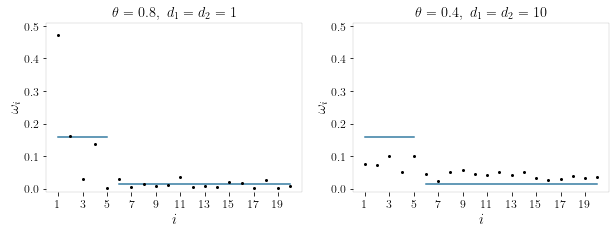

In [7]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=set_size(LATEX_WIDTH, fraction=1.6, subplots=(1,2)))

d1 = 1
d2 = d1
theta = .8
Z1 = np.random.dirichlet(np.repeat(d1, k))
Z2 = np.random.dirichlet(np.repeat(d2, n-k))

mask = np.ones(n, dtype=bool)
mask[I] = False

w_hat = np.zeros(n)
w_hat[I] = theta * Z1
w_hat[I_not] = (1-theta) * Z2

#plt.figure(figsize=set_size(LATEX_WIDTH, fraction=1., subplots=(1,1)))
ax0.plot(I, w_true[I], color=blue)
ax0.plot(I_not, w_true[mask], color=blue)
ax0.plot(w_hat, ls='', marker='o', color='black', markersize=2)
ax0.set_title(f'$\\theta={theta},~d_1=d_2={d1}$')
#plt.plot(I, np.repeat(w_hat[I].mean(), len(I)), color=grey, ls='--')
#plt.plot(I_not, np.repeat(w_hat[I_not].mean(), len(I_not)), color=grey, ls='--')
ax0.set_ylim(-0.01,0.51)
ax0.set_ylabel("$\\omega_i$", fontsize=15)
_ = ax0.set_xticks(np.arange(0,20,2), np.arange(0,20,2)+1)
ax0.set_xlabel("$i$", fontsize=15)

d1 = 10
d2 = d1
theta = .4
Z1 = np.random.dirichlet(np.repeat(d1, k))
Z2 = np.random.dirichlet(np.repeat(d2, n-k))

mask = np.ones(n, dtype=bool)
mask[I] = False

w_hat = np.zeros(n)
w_hat[I] = theta * Z1
w_hat[I_not] = (1-theta) * Z2

#plt.figure(figsize=set_size(LATEX_WIDTH, fraction=1., subplots=(1,1)))
ax1.plot(I, w_true[I], color=blue)
ax1.plot(I_not, w_true[mask], color=blue)
ax1.plot(w_hat, ls='', marker='o', color='black', markersize=2)
ax1.set_title(f'$\\theta={theta},~d_1=d_2={d1}$')
#plt.plot(I, np.repeat(w_hat[I].mean(), len(I)), color=grey, ls='--')
#plt.plot(I_not, np.repeat(w_hat[I_not].mean(), len(I_not)), color=grey, ls='--')
ax1.set_ylim(-0.01,0.51)
ax1.set_ylabel("$\\omega_i$", fontsize=15)
_ = ax1.set_xticks(np.arange(0,20,2), np.arange(0,20,2)+1)
ax1.set_xlabel("$i$", fontsize=15)

#fig.savefig('./plots/weight_example_combined.pdf', bbox_inches='tight', pad_inches=0.1, dpi=1000)

#plt.savefig(f'./plots/weight_example_theta_star={theta_s}_theta={theta}_d1={d1}_d2={d2}_n={n}_k={k}.pdf', bbox_inches='tight',pad_inches=0.1, dpi=1000)  

In [8]:
def var_dir(k,d):
    p1 = 1 / (k ** 2 * d + k)
    p2 = 1 / (k ** 3 * d + k ** 2)
    return p1 - p2

In [9]:
w_hat[I].sum()

0.3999999999999999

In [10]:
def ese(theta_star, theta, n, k, d1, d2):
    p1 = 2 * ( ((theta_star * theta) / k) + ((1-theta_star)*(1-theta))/((n-k)) )
    
    p2 = theta**2 / k + (1-theta)**2/(n-k)
    
    p3 = theta**2 * (k-1)/(k*(d1*k + 1))
    
    p4 = (1-theta)** 2 * (n-k-1)/((n-k)*(d2*(n-k) + 1))
    
    return 1 -p1+p2+p3+p4


def ecrps(theta_star, theta, n, k, d1, d2):
    
    p1 = 2/np.sqrt(np.pi) * ( theta*(k-1) * (theta_star/k - d1*theta/(2*(d1*k + 1))) )
    p2 = 2/np.sqrt(np.pi) * ( (1-theta)*(n-k-1) * ((1-theta_star)/(n-k) - d2 * (1-theta)/(2*(d2*(n-k)+1))) )
    p3 = 2/np.sqrt(np.pi) * ( theta_star + theta**2 - 2*theta_star*theta )
    
    return p1 + p2 + p3

def ecrps2(theta_star, theta, n, k, d1, d2):
    
    c1 = 2*(k*d1 + 1)
    c2 = 2*((n-k)*d2 + 1)
    c3 = n-k-1
    
    p1 = -((k-1)*d1)/c1 - (c3*d2)/c2 + 1
    p2 = (theta_star * (k-1))/k - (c3*(1-theta_star))/(n-k) + (2*c3*d2)/c2 - 2*theta_star
    p3 = c3 * ( (1-theta_star)/(n-k) - d2/c2 ) + theta_star
    
    return 2/np.sqrt(np.pi) * (theta**2 * p1 + theta * p2 + p3), 2/np.sqrt(np.pi)*p1, 2/np.sqrt(np.pi)*p2, 2/np.sqrt(np.pi)*p3
               

def ese2(theta_star, theta, n, k, d1, d2):
    
    c1 = (n-k)*((n-k)*d2 + 1)
    c2 = n-k-1
    c3 = c2/c1
    
    p1 = (1/k + 1/(n-k) + (k-1)/(k*(k*d1+1)) + c3) 
    p2 = (-4 + 2*theta_star)/(n-k) - 2*c3 - 2*theta_star/k 
    p3 = (3-2*theta_star)/(n-k) + c3
    
    return 1 - ((theta**2) * p1) + theta*p2 + p3

def ese3(theta_star, theta, n, k, d1, d2):
    
    c1 = (n-k)*((n-k)*d2 + 1)
    c2 = n-k-1
    c3 = c2/c1
    
    p1 = 1/k + 1/(n-k) + (k-1)/(k*(k*d1 + 1)) + c3
    p2 = 2 * ( -theta_star/k - theta_star/(n-k) - c3 )
    p3 = (-1 + 2*theta_star)/(n-k) + c3 + 1
    
    return (theta**2) * p1 + (theta*p2) + p3, p1, p2, p3

In [11]:
theta_x = np.linspace(0,1,1000)

n = 1000
k = 20
I = np.arange(k)
I_not = np.arange(I[-1]+1, n)
theta_s = .8
w_true = np.array([theta_s/k if i in I else (1-theta_s)/(n-k) for i in range(n)])

d1 = 10
d2 = 0.01
theta = .8
Z1 = np.random.dirichlet(np.repeat(d1, k))
Z2 = np.random.dirichlet(np.repeat(d2, n-k))

ese_res = np.array([ese(theta_s, t, n, k, d1, d2) for t in theta_x])
ese_res2 = np.array([ese(theta_s, t, n, k, d1, 0.01) for t in theta_x])
ecrps_res = np.array([ecrps(theta_s, t, n, k, d1, d2) for t in theta_x])
ecrps_res2 = np.array([ecrps(theta_s, t, n, k, d1, 0.01) for t in theta_x])


In [12]:
ese_res3 = np.array([ese(theta_s, .7, n, t, d1, .01) for t in np.arange(1,20)])


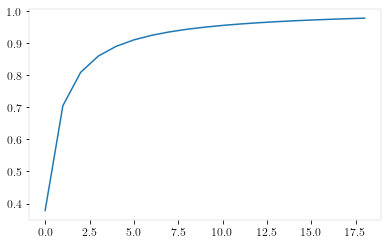

In [13]:
plt.plot(ese_res3)

In [14]:
np.array([ese3(theta_s, t, n, k, d1, d2) for t in theta_x])[0,:].shape

(4,)

In [15]:
ese2_tot = np.array([ese3(theta_s, t, n, k, d1, d2) for t in theta_x])
ecrps2_tot = np.array([ecrps2(theta_s, t, n, k, d1, d2) for t in theta_x])
ese2_res = ese2_tot[:,0]
se_p1 = ese2_tot[:,1][0]
se_p2 = ese2_tot[:,2][0]
se_p3 = ese2_tot[:,3][0]
ecrps2_res = ecrps2_tot[:,0]
cr_p1 = ecrps2_tot[:,1][0]
cr_p2 = ecrps2_tot[:,2][0]
cr_p3 = ecrps2_tot[:,3][0]

In [16]:
print(cr_p1, cr_p2, cr_p3)

0.08363822087778852 -0.1504292332550801 0.6167214761020499


In [17]:
print(cr_p1, cr_p2, cr_p3)

0.08363822087778852 -0.1504292332550801 0.6167214761020499


In [18]:
print(se_p1, se_p2, se_p3)

0.1482448866777225 -0.26662887377173095 1.0931103552532124


In [19]:
se_p3 * (1/np.sqrt(np.pi))

0.6167214761020499

In [20]:
crps_f = lambda x: cr_p1 * x ** 2 + cr_p2 * x + cr_p3
se_f = lambda x: se_p1 * x ** 2 + se_p2 * x + se_p3

In [21]:
crps_f(.5)

0.562416414693957

In [22]:
se_f(.5)

0.9968571400367776

In [23]:
crps_f(.5) == 1/np.sqrt(np.pi) * se_f(.5)

True

In [24]:
crps_p = lambda x: 2 * cr_p1 * x + cr_p2 

In [25]:
se_p = lambda x: 2*x*se_p1 + 2*se_p2

In [26]:
a = [crps_p(t) for t in theta_x]
b = [se_p(t) for t in theta_x]

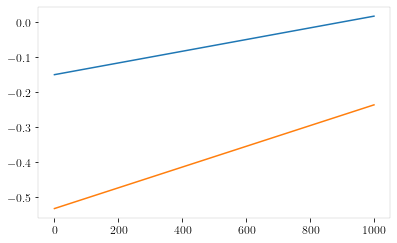

In [27]:
plt.plot(a)
plt.plot(b)

In [28]:
np.allclose(ese_res, ese2_res)

True

In [29]:
np.allclose(ecrps_res, ecrps2_res)

True

In [30]:
ecrps_res / ese_res

array([0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418958,
       0.56418958, 0.56418958, 0.56418958, 0.56418958, 0.56418

In [31]:
np.allclose(ecrps_res , ese_res * 1/np.sqrt(np.pi))

True

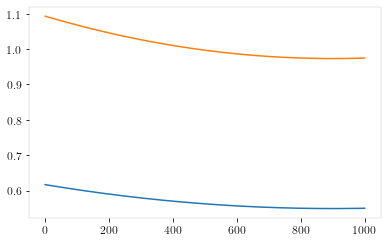

In [32]:
plt.plot(ecrps_res)
plt.plot(ese_res)

Text(0.5, 0, '$\\theta$')

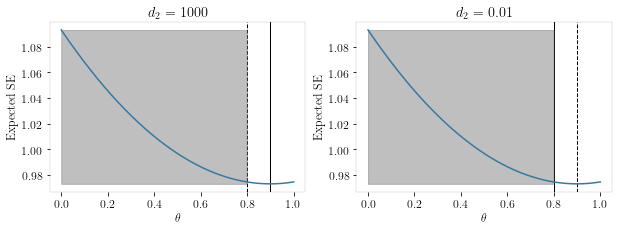

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=set_size(LATEX_WIDTH, fraction=1.6, subplots=(1,2)))
ax1.plot(theta_x, ese_res, color=blue)
ax1.fill_between(theta_x, min(ese_res), max(ese_res), where=(ese_res > ese_res[-1]), color='grey', alpha=0.5)
ax1.axvline(theta_x[np.argmin(ese_res)], color='black', linewidth=1, zorder=-2)
ax1.axvline(theta_s, color='black', ls='--', linewidth=1, zorder=-1)
ax1.set_ylabel("Expected SE")
ax1.set_title("$d_2 = 1000$")
ax1.set_xlabel("$\\theta$")

ax2.plot(theta_x, ese_res2, color=blue)
ax2.fill_between(theta_x, min(ese_res2), max(ese_res2), where=(ese_res2 > ese_res2[-1]), color='grey', alpha=0.5)
ax2.axvline(theta_x[np.argmin(ese_res2)], color='black', linewidth=1, zorder=-2, ls='--')
ax2.axvline(theta_s, color='black', ls='-', linewidth=1, zorder=-1)
ax2.set_ylabel("Expected SE")
ax2.set_title("$d_2 = 0.01$")
ax2.set_xlabel("$\\theta$")
#plt.savefig(f'./plots/SE_theta_star={theta_s}_d1={d1}_d2={d2},001_n={n}_k={k}.pdf', bbox_inches='tight',pad_inches=0.1, dpi=1000)  

In [34]:
2 / np.sqrt(np.pi)

1.1283791670955126

Text(0.5, 0, '$\\theta$')

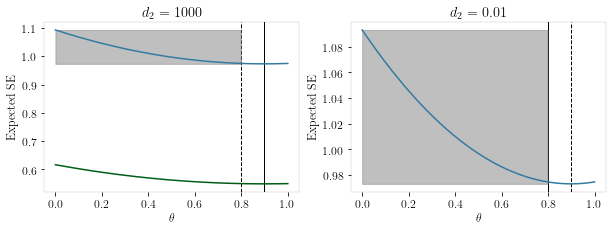

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=set_size(LATEX_WIDTH, fraction=1.6, subplots=(1,2)))
ax1.plot(theta_x, ese_res, color=blue)
ax1.plot(theta_x, ecrps_res, color=green)
ax1.fill_between(theta_x, min(ese_res), max(ese_res), where=(ese_res > ese_res[-1]), color='grey', alpha=0.5)
ax1.axvline(theta_x[np.argmin(ese_res)], color='black', linewidth=1, zorder=-2)
ax1.axvline(theta_s, color='black', ls='--', linewidth=1, zorder=-1)
ax1.set_ylabel("Expected SE")
ax1.set_title("$d_2 = 1000$")
ax1.set_xlabel("$\\theta$")

ax2.plot(theta_x, ese_res2, color=blue)
ax2.fill_between(theta_x, min(ese_res2), max(ese_res2), where=(ese_res2 > ese_res2[-1]), color='grey', alpha=0.5)
ax2.axvline(theta_x[np.argmin(ese_res2)], color='black', linewidth=1, zorder=-2, ls='--')
ax2.axvline(theta_s, color='black', ls='-', linewidth=1, zorder=-1)
ax2.set_ylabel("Expected SE")
ax2.set_title("$d_2 = 0.01$")
ax2.set_xlabel("$\\theta$")
#plt.savefig(f'./plots/SE_theta_star={theta_s}_d1={d1}_d2={d2},001_n={n}_k={k}.pdf', bbox_inches='tight',pad_inches=0.1, dpi=1000)  

Text(0.5, 0, '$\\theta$')

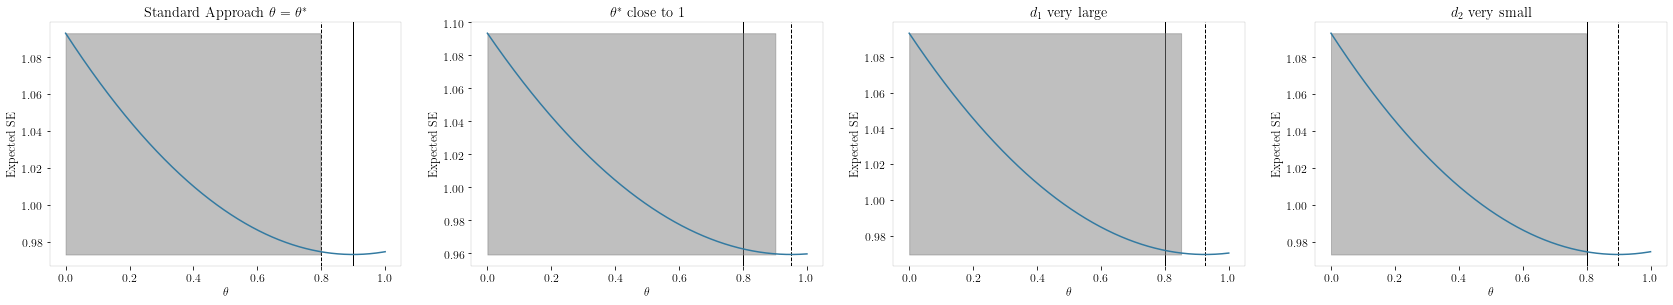

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=set_size(LATEX_WIDTH, fraction=4.6, subplots=(1,4)))

ese_res = np.array([ese(theta_s, t, n, k, d1, d2) for t in theta_x])
ese_res2 = np.array([ese(0.95, t, n, k, d1, d2) for t in theta_x])
ese_res3 = np.array([ese(theta_s, t, n, k, d1*10, d2) for t in theta_x])
ese_res4 = np.array([ese(theta_s, t, n, k, d1, 0.01) for t in theta_x])


ax1.plot(theta_x, ese_res, color=blue)
ax1.fill_between(theta_x, min(ese_res), max(ese_res), where=(ese_res > ese_res[-1]), color='grey', alpha=0.5)
ax1.axvline(theta_x[np.argmin(ese_res)], color='black', linewidth=1, zorder=-2)
ax1.axvline(theta_s, color='black', ls='--', linewidth=1, zorder=-1)
ax1.set_ylabel("Expected SE")
ax1.set_title("Standard Approach $\\theta = \\theta^*$")
ax1.set_xlabel("$\\theta$")

ax2.plot(theta_x, ese_res2, color=blue)
ax2.fill_between(theta_x, min(ese_res2), max(ese_res2), where=(ese_res2 > ese_res2[-1]), color='grey', alpha=0.5)
ax2.axvline(theta_x[np.argmin(ese_res2)], color='black', linewidth=1, zorder=-2, ls='--')
ax2.axvline(theta_s, color='black', ls='-', linewidth=1, zorder=-1)
ax2.set_ylabel("Expected SE")
ax2.set_title("$\\theta^*$ close to 1")
ax2.set_xlabel("$\\theta$")

ax3.plot(theta_x, ese_res3, color=blue)
ax3.fill_between(theta_x, min(ese_res3), max(ese_res3), where=(ese_res3 > ese_res3[-1]), color='grey', alpha=0.5)
ax3.axvline(theta_x[np.argmin(ese_res3)], color='black', linewidth=1, zorder=-2, ls='--')
ax3.axvline(theta_s, color='black', ls='-', linewidth=1, zorder=-1)
ax3.set_ylabel("Expected SE")
ax3.set_title("$d_1$ very large")
ax3.set_xlabel("$\\theta$")

ax4.plot(theta_x, ese_res4, color=blue)
ax4.fill_between(theta_x, min(ese_res4), max(ese_res4), where=(ese_res4 > ese_res4[-1]), color='grey', alpha=0.5)
ax4.axvline(theta_x[np.argmin(ese_res4)], color='black', linewidth=1, zorder=-2, ls='--')
ax4.axvline(theta_s, color='black', ls='-', linewidth=1, zorder=-1)
ax4.set_ylabel("Expected SE")
ax4.set_title("$d_2$ very small")
ax4.set_xlabel("$\\theta$")

Text(0.5, 0, '$\\theta$')

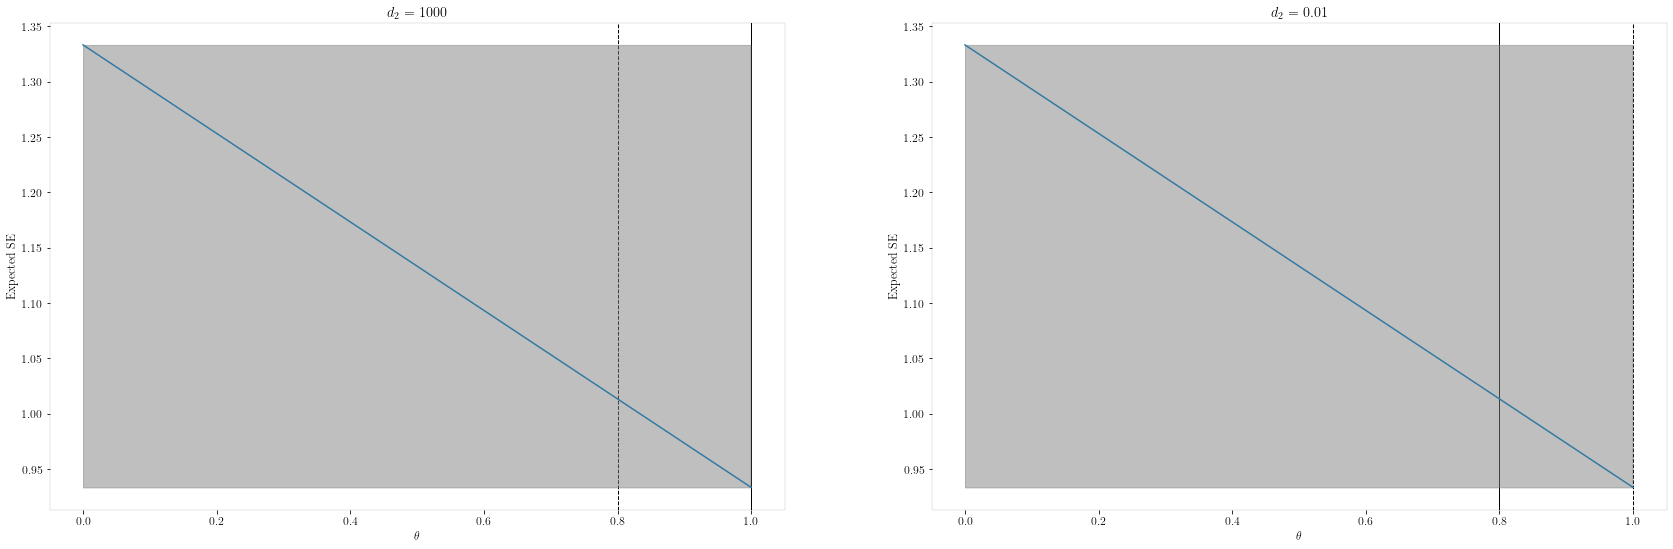

In [37]:
thetastar_x = np.linspace(0,1,1000)
theta = .6
n = 100
k = 5

d1 = 1
d2 = 1000

Z1 = np.random.dirichlet(np.repeat(d1, k))
Z2 = np.random.dirichlet(np.repeat(d2, n-k))

ese_res = np.array([ese(t, 1, n, k, d1, d2) for t in thetastar_x])
ese_res2 = np.array([ese(t, 1, n, k, d1, 0.01) for t in thetastar_x])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=set_size(LATEX_WIDTH, fraction=4.6, subplots=(1,2)))
ax1.plot(theta_x, ese_res, color=blue)
ax1.fill_between(theta_x, min(ese_res), max(ese_res), where=(ese_res > ese_res[-1]), color='grey', alpha=0.5)
ax1.axvline(theta_x[np.argmin(ese_res)], color='black', linewidth=1, zorder=-2)
ax1.axvline(theta_s, color='black', ls='--', linewidth=1, zorder=-1)
ax1.set_ylabel("Expected SE")
ax1.set_title("$d_2 = 1000$")
ax1.set_xlabel("$\\theta$")

ax2.plot(theta_x, ese_res2, color=blue)
ax2.fill_between(theta_x, min(ese_res2), max(ese_res2), where=(ese_res2 > ese_res2[-1]), color='grey', alpha=0.5)
ax2.axvline(theta_x[np.argmin(ese_res2)], color='black', linewidth=1, zorder=-2, ls='--')
ax2.axvline(theta_s, color='black', ls='-', linewidth=1, zorder=-1)
ax2.set_ylabel("Expected SE")
ax2.set_title("$d_2 = 0.01$")
ax2.set_xlabel("$\\theta$")

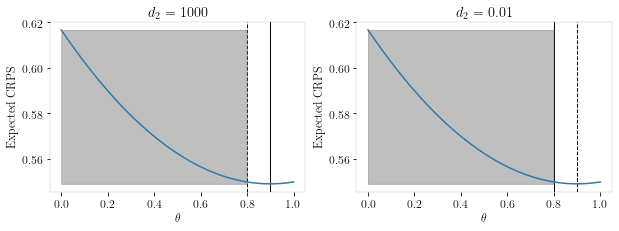

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=set_size(LATEX_WIDTH, fraction=1.6, subplots=(1,2)))
ax1.plot(theta_x, ecrps_res, color=blue)
ax1.fill_between(theta_x, min(ecrps_res), max(ecrps_res), where=(ecrps_res > ecrps_res[-1]), color='grey', alpha=0.5)
ax1.axvline(theta_x[np.argmin(ecrps_res)], color='black', linewidth=1, zorder=-2)
ax1.axvline(theta_s, color='black', ls='--', linewidth=1, zorder=-1)
ax1.set_ylabel("Expected CRPS")
ax1.set_title("$d_2 = 1000$")
ax1.set_xlabel("$\\theta$")

ax2.plot(theta_x, ecrps_res2, color=blue)
ax2.fill_between(theta_x, min(ecrps_res2), max(ecrps_res2), where=(ecrps_res2 > ecrps_res2[-1]), color='grey', alpha=0.5)
ax2.axvline(theta_x[np.argmin(ecrps_res2)], color='black', linewidth=1, zorder=-2, ls='--')
ax2.axvline(theta_s, color='black', ls='-', linewidth=1, zorder=-1)
ax2.set_ylabel("Expected CRPS")
ax2.set_title("$d_2 = 0.01$")
ax2.set_xlabel("$\\theta$")

plt.savefig(f'./plots/CRPS_theta_star={theta_s}_d1={d1}_d2={d2},001_n={n}_k={k}.pdf', bbox_inches='tight',pad_inches=0.1, dpi=1000)  

Text(0, 0.5, 'Expected CRPS')

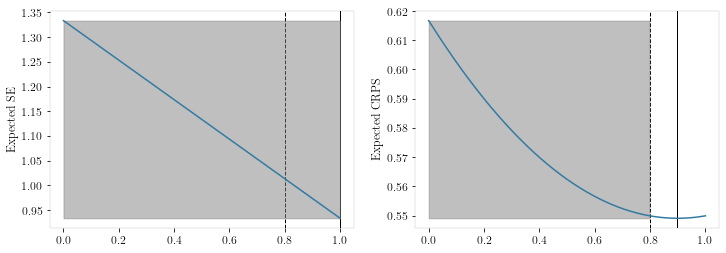

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
ax1.plot(theta_x, ese_res, color=blue)
ax1.fill_between(theta_x, min(ese_res), max(ese_res), where=(ese_res > ese_res[-1]), color='grey', alpha=0.5)
ax1.axvline(theta_x[np.argmin(ese_res)], color='black', linewidth=1, zorder=-2)
ax1.axvline(theta_s, color='black', ls='--', linewidth=1, zorder=-1)
ax1.set_ylabel("Expected SE")

ax2.plot(theta_x, ecrps_res, color=blue)
ax2.fill_between(theta_x, min(ecrps_res), max(ecrps_res), where=(ecrps_res > ecrps_res[-1]), color='grey', alpha=0.5)
ax2.axvline(theta_x[np.argmin(ecrps_res)], color='black', linewidth=1, zorder=-2)
ax2.axvline(theta_s, color='black', ls='--', linewidth=1, zorder=-1)
ax2.set_ylabel("Expected CRPS")

In [40]:
np.all(ese_res / ecrps_res)

True

# Simulation Expected Scores

In [41]:
def ese(theta_star, theta, n, k, d1, d2):
    p1 = 2 * ( ((theta_star * theta) / k) + ((1-theta_star)*(1-theta))/((n-k)) )
    
    p2 = theta**2 / k + (1-theta)**2/(n-k)
    
    p3 = theta**2 * (k-1)/(k*(d1*k + 1))
    
    p4 = (1-theta)** 2 * (n-k-1)/((n-k)*(d2*(n-k) + 1))
    
    return 1 -p1+p2+p3+p4


def ecrps(theta_star, theta, n, k, d1, d2):
    
    p1 = 2/np.sqrt(np.pi) * ( theta*(k-1) * (theta_star/k - d1*theta/(2*(d1*k + 1))) )
    p2 = 2/np.sqrt(np.pi) * ( (1-theta)*(n-k-1) * ((1-theta_star)/(n-k) - d2 * (1-theta)/(2*(d2*(n-k)+1))) )
    p3 = 2/np.sqrt(np.pi) * ( theta_star + theta**2 - 2*theta_star*theta )
    
    return p1 + p2 + p3

In [44]:
def expected_crps(w, w_true, x):
    e_crps = 0
    
    for i in range(n):
        for j in range(n):
            tmp = np.abs(x[i]-x[j])
            e_crps += tmp*w[i]*(w_true[j] - .5*w[j])
    
    return e_crps

def expected_se(w, w_true, x):
    fc = np.sum(w*x)
    
    return np.sum(w_true * (x-fc)**2 )

In [58]:
n = 36
k = 5
d1 = 12
d2 = 12
theta_star = .7
theta = .6
n_mc = int(5e4)

w_true = np.concatenate([np.repeat(theta_star/k, k), np.repeat((1-theta_star)/(n-k), n-k)])
res_std = np.zeros((n_mc, 2))
res_uni = np.zeros((n_mc, 2))
res_n05 = np.zeros((n_mc, 2))
res_n71 = np.zeros((n_mc, 2))
res_nR1 = np.zeros((n_mc, 2))

In [59]:
for l in range(n_mc):
    
    w = np.concatenate([np.random.dirichlet(np.repeat(d1, k))*theta,
                        np.random.dirichlet(np.repeat(d2, n-k))*(1-theta)])
    
    x_std = np.random.standard_normal(n)
    res_std[l,0] = expected_se(w, w_true, x_std)
    res_std[l,1] = expected_crps(w, w_true, x_std)
    
    x_uni = np.random.uniform(0, 1, n)
    res_uni[l,0] = expected_se(w, w_true, x_uni)
    res_uni[l,1] = expected_crps(w, w_true, x_uni)   

    x_n05 = np.random.normal(0, 5, n)
    res_n05[l,0] = expected_se(w, w_true, x_n05)
    res_n05[l,1] = expected_crps(w, w_true, x_n05)   

    x_n71 = np.random.normal(7, 1, n)
    res_n71[l,0] = expected_se(w, w_true, x_n71)
    res_n71[l,1] = expected_crps(w, w_true, x_n71)   
    
    x_nR1 = np.random.normal(x_std, 1, n)
    res_nR1[l,0] = expected_se(w, w_true, x_nR1)
    res_nR1[l,1] = expected_crps(w, w_true, x_nR1)   

In [62]:
r4 = lambda x: np.round(x, 4)
print("MSE: N(0,1), U(0,1), N(0,5), N(7,1), N(X,1)")
print(r4(res_std[:,0].mean()), r4(res_uni[:,0].mean()), r4(res_n05[:,0].mean()), r4(res_n71[:,0].mean()), r4(res_nR1[:,0].mean()))
print("CRPS: N(0,1), U(0,1), N(0,5), N(7,1), N(X,1)")
print(r4(res_std[:,1].mean()), r4(res_uni[:,1].mean()), r4(res_n05[:,1].mean()), r4(res_n71[:,1].mean()), r4(res_nR1[:,1].mean()))

MSE: N(0,1), U(0,1), N(0,5), N(7,1), N(X,1)
0.906 0.0755 22.6446 0.9111 1.816
CRPS: N(0,1), U(0,1), N(0,5), N(7,1), N(X,1)
0.5113 0.151 2.5566 0.5128 0.724


In [63]:
print('Verhältnis CRPS/SE: ')
print("N(0,1), U(0,1), N(0,5), N(7,1), N(X,1)")
print(r4((res_std[:,1]/res_std[:,0]).mean()), r4((res_uni[:,1]/res_uni[:,0]).mean()), r4((res_n05[:,1]/res_n05[:,0]).mean()), r4((res_n71[:,1]/res_n71[:,0]).mean()), r4((res_nR1[:,1]/res_nR1[:,0]).mean()))

Verhältnis CRPS/SE: 
N(0,1), U(0,1), N(0,5), N(7,1), N(X,1)
0.6172 2.0985 0.1234 0.6157 0.4359


In [75]:
print('Verhältnis CRPS/SE: ')
print("N(0,1), U(0,1), N(0,5), N(7,1), N(X,1)")
print(r4(res_std[:,1].mean()/res_std[:,0].mean()), r4(res_uni[:,1].mean()/res_uni[:,0].mean()), r4(res_n05[:,1].mean()/res_n05[:,0].mean()), r4(res_n71[:,1].mean()/res_n71[:,0].mean()), r4(res_nR1[:,1].mean()/res_nR1[:,0].mean()))

Verhältnis CRPS/SE: 
N(0,1), U(0,1), N(0,5), N(7,1), N(X,1)
0.5643 2.0006 0.1129 0.5628 0.3987


In [74]:
res_std[:,1].mean()/res_std[:,0].mean()

0.5643080249247441

In [64]:
1/np.sqrt(np.pi)

0.5641895835477563

In [65]:
(res_std[:,1] / res_std[:,0]).mean()

0.6172052126309039

In [71]:
(res_uni[:,1] / res_uni[:,0]).mean()

2.0985290862554464

In [72]:
theory = []

theory.append(ese(theta_star, theta, n, k, d1, d2))
theory.append(ecrps(theta_star, theta, n, k, d1, d2))

In [73]:
theory[1] / theory[0]

0.5641895835477563

In [53]:
r4 = lambda x: np.round(x, 4)
print("MSE: Theory / Empirics")
print(r4(theory[0]), '/' ,r4(np.mean(res_std[:,0])))
print("CRPS: Theory / Empirics")
print(r4(theory[1]), '/' ,r4(np.mean(res_std[:,1])))

MSE: Theory / Empirics
0.9066 / 0.907
CRPS: Theory / Empirics
0.5115 / 0.5115


In [84]:
r4 = lambda x: np.round(x, 4)
print("MSE: Theory / Empirics")
print(r4(theory[0]), '/' ,r4(np.mean(res[:,0])))
print("CRPS: Theory / Empirics")
print(r4(theory[1]), '/' ,r4(np.mean(res[:,1])))

MSE: Theory / Empirics
0.9826 / 0.9094
CRPS: Theory / Empirics
0.5544 / 0.5124


In [24]:
def ese(theta_star, theta, n, k, d1, d2):
    p1 = 2 * ( ((theta_star * theta) / k) + ((1-theta_star)*(1-theta))/((n-k)) )
    
    p2 = theta**2 / k + (1-theta)**2/(n-k)
    
    p3 = theta**2 * (k-1)/(k*(d1*k + 1))
    
    p4 = (1-theta)** 2 * (n-k-1)/((n-k)*(d2*(n-k) + 1))
    
    return 1 -p1+p2+p3+p4

In [25]:
sq = lambda x: x ** 2

def theory_mse(theta, theta_star, k, n, d1, d2):
    
    p1 = sq(theta)/k + sq(1-theta)/(n-k)
    
    p2 = 2 * ((theta*theta_star)/k + (1-theta)*(1-theta_star)/(n-k))
    
    p3 = (k-1)/(k*(d1*k + 1))
    
    p4 = (n-k-1)/((n-k)*(d2*(n-k) + 1))
    
    return 1 + p1 - p2 + p3 + p4

In [26]:
def ecrps2(theta_star, theta, n, k, d1, d2):
    
    p1 = 2/np.sqrt(np.pi) * ( theta*(k-1) * (theta_star/k - d1*theta/(2*(d1*k + 1))) )
    p2 = 2/np.sqrt(np.pi) * ( (1-theta)*(n-k-1) * ((1-theta_star)/(n-k) - d2 * (1-theta)/(2*(d2*(n-k)+1))) )
    p3 = 2/np.sqrt(np.pi) * ( theta_star + theta**2 - 2*theta_star*theta )
    
    return p1 + p2 + p3

In [27]:
r4(theory_mse(theta, theta_star, k, n, d1, d2))

0.9171

In [28]:

# Example plot showing true and esitmated weights (for one simulation run)
# matplot(cbind(w_true, w), pch = 20, ylab = "", bty = "n")

theory <- rep(NA, 2)
# Expected SE
sq <- function(x) (x^2)
m1 <- function(x) (x-1)
p1 <- function(x) (x+1)
theory[1] <- 1 + sq(theta)/k + sq(1-theta)/(n-k) - 
  2*((theta*theta_star)/k + (1-theta)*(1-theta_star)/(n-k)) + 
  (sq(theta)*m1(k))/(k*p1(d1*k)) + 
  (sq(1-theta)*m1(n-k))/((n-k)*p1((n-k)*d2))
# Expected CRPS
theory[2] <- (theta*(k-1)*(theta_star/k - 
                             .5*(theta*d1)/(k*d1+1)) + 
                (1-theta)*(n-k-1)*
                ((1-theta_star)/(n-k)-
                   .5*(1-theta)*d2/((n-k)*d2 + 1)) +
                theta_star + 
                (theta^2)-2*theta*theta_star)*2/sqrt(pi)

r3 <- function(x) round(x, 3)
print("MSE: Theory / Empirics")
print(paste(r3(theory[1]), "/",
            r3(mean(res[,1]))))
print("CRPS: Theory / Empirics")
print(paste(r3(theory[2]), "/",
            r3(mean(res[,2]))))

SyntaxError: invalid syntax (659568401.py, line 9)